In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### reading the data files

In [281]:
diabetes = pd.read_csv("diabetic_data.csv")
id_mapping = pd.read_csv("IDs_mapping.csv")

#### dimensions of the data 

In [282]:
print(diabetes.shape)
print(id_mapping.shape)

(101766, 50)
(67, 2)


#### structure / data types of attributes

In [283]:
diabetes.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

#### Numerical attributes

In [284]:
diabetes_num_attr = diabetes.ix[:,['encounter_id','patient_nbr',
                                                'time_in_hospital','num_lab_procedures',
                                                'num_procedures','num_medications',
                                                'number_outpatient','number_emergency',
                                                'number_inpatient','number_diagnoses']]
diabetes_num_attr.dtypes

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


encounter_id          int64
patient_nbr           int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

#### Categorical attributes

In [285]:
diabetes_cat_attr = diabetes.ix[:,["race", "gender", "age", "admission_type_id", "discharge_disposition_id",
"admission_source_id", "payer_code", "medical_specialty", "diag_1", 
"diag_2", "diag_3", "max_glu_serum", "A1Cresult", "metformin", 
"repaglinide", "nateglinide", "chlorpropamide", "glimepiride", 
"acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", 
"rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", 
"examide", "citoglipton", "insulin", "glyburide.metformin", "glipizide.metformin", 
"glimepiride.pioglitazone", "metformin.rosiglitazone", "metformin.pioglitazone", 
"change", "diabetesMed", "readmitted"]]

diabetes_cat_attr.dtypes

race                         object
gender                       object
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
payer_code                   object
medical_specialty            object
diag_1                       object
diag_2                       object
diag_3                       object
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                  object
pioglitazone                 object
rosiglitazone                object
acarbose                     object
miglitol                     object
troglitazone                 object
tolazamide                  

#### Changing type of attributes

In [297]:
for i in diabetes_cat_attr:
    diabetes_cat_attr[i] = diabetes_cat_attr[i].astype('category')

In [296]:
diabetes_cat_attr.dtypes

race                         object
gender                       object
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
payer_code                   object
medical_specialty            object
diag_1                       object
diag_2                       object
diag_3                       object
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                  object
pioglitazone                 object
rosiglitazone                object
acarbose                     object
miglitol                     object
troglitazone                 object
tolazamide                  

In [307]:
for i in diabetes_num_attr :
    diabetes_num_attr[i] = diabetes_num_attr[i].astype(np.int64)

diabetes_num_attr.dtypes

encounter_id          int64
patient_nbr           int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

#### Categories for all the categorical values

In [306]:
for i in diabetes_cat_attr:
    print(i)
    print(diabetes_cat_attr[i].cat.categories)

race
Index(['?', 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other'], dtype='object')
gender
Index(['Female', 'Male', 'Unknown/Invalid'], dtype='object')
age
Index(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'],
      dtype='object')
admission_type_id
Int64Index([1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')
discharge_disposition_id
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 22, 23, 24, 25, 27, 28],
           dtype='int64')
admission_source_id
Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17, 20, 22, 25], dtype='int64')
payer_code
Index(['?', 'BC', 'CH', 'CM', 'CP', 'DM', 'FR', 'HM', 'MC', 'MD', 'MP', 'OG',
       'OT', 'PO', 'SI', 'SP', 'UN', 'WC'],
      dtype='object')
medical_specialty
Index(['?', 'AllergyandImmunology', 'Anesthesiology',
       'Anesthesiology-Pediatric', 'Cardiology', 'Cardiology-Pediatric',
       'DCPTEAM', 'Dentistry

In [313]:
a = [diabetes_num_attr,diabetes_cat_attr]

diabetes_new = pd.concat(a,axis=1)

diabetes_new.dtypes

encounter_id                   int64
patient_nbr                    int64
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
number_diagnoses               int64
race                        category
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
payer_code                  category
medical_specialty           category
diag_1                      category
diag_2                      category
diag_3                      category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
g

In [236]:
print(diabetes_cat_attr.shape)
print(diabetes_num_aatr.shape)

(101766, 39)
(101766, 10)


In [326]:
cor = diabetes_num_attr.corr()


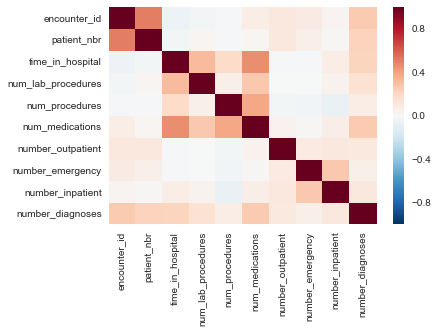

In [347]:
sns.heatmap(cor)

In [352]:
diabetes_new.isnull().sum()

encounter_id                     0
patient_nbr                      0
time_in_hospital                 0
num_lab_procedures               0
num_procedures                   0
num_medications                  0
number_outpatient                0
number_emergency                 0
number_inpatient                 0
number_diagnoses                 0
race                             0
gender                           0
age                              0
admission_type_id                0
discharge_disposition_id         0
admission_source_id              0
payer_code                       0
medical_specialty                0
diag_1                           0
diag_2                           0
diag_3                           0
max_glu_serum                    0
A1Cresult                        0
metformin                        0
repaglinide                      0
nateglinide                      0
chlorpropamide                   0
glimepiride                      0
acetohexamide       

In [355]:
diabetes_new['glyburide.metformin']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
          ..
101736   NaN
101737   NaN
101738   NaN
101739   NaN
101740   NaN
101741   NaN
101742   NaN
101743   NaN
101744   NaN
101745   NaN
101746   NaN
101747   NaN
101748   NaN
101749   NaN
101750   NaN
101751   NaN
101752   NaN
101753   NaN
101754   NaN
101755   NaN
101756   NaN
101757   NaN
101758   NaN
101759   NaN
101760   NaN
101761   NaN
101762   NaN
101763   NaN
101764   NaN
101765   NaN
Name: glyburide.metformin, Length: 101766, dtype: category
Categories (0, float64): []